<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [3]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
# Libraries for data preparation and model building
import optuna
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import shap
# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [5]:
df = pd.read_csv("../Time Series Project/df_train.csv")
df_test = pd.read_csv("../Time Series Project/df_test.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [7]:
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract(r'(\d+)').astype(float)
df['Seville_pressure'] = df['Seville_pressure'].str.extract(r'(\d+)').astype(float)
print(df.info()) #checking the data type of each column in the data
print('\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   float64
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [8]:
df.head(10).T 

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00,2015-01-01 18:00:00,2015-01-01 21:00:00,2015-01-02 00:00:00,2015-01-02 03:00:00,2015-01-02 06:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Valencia_wind_deg,5.0,10.0,9.0,8.0,7.0,7.0,8.0,9.0,9.0,9.0
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.333333
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0,69.666667,83.666667,83.666667,86.0,87.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0,67.333333,63.333333,64.0,63.333333,63.666667
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0,12.333333,16.333333,8.666667,5.333333,15.333333
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333,0.666667,1.0,1.333333,1.0,1.0


In [9]:
df['time'] = pd.to_datetime(df['time'])  # Konwersja na format datetime
df.set_index('time', inplace=True)  # Ustawienie indeksu czasowego

In [10]:
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Valencia_wind_deg         -1.186661
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_pressure          -1.220040
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10

<Axes: ylabel='Barcelona_pressure'>

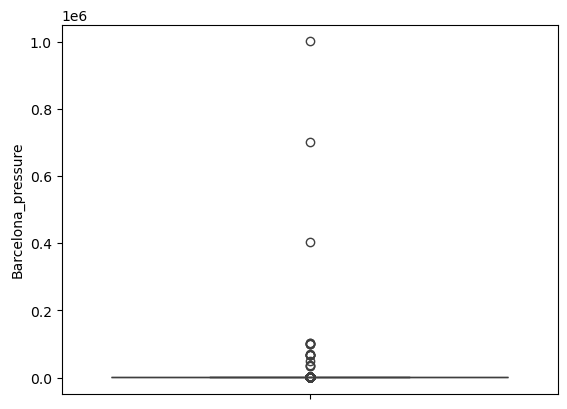

In [11]:
sns.boxplot(df['Barcelona_pressure'])

<Axes: xlabel='Valencia_wind_speed'>

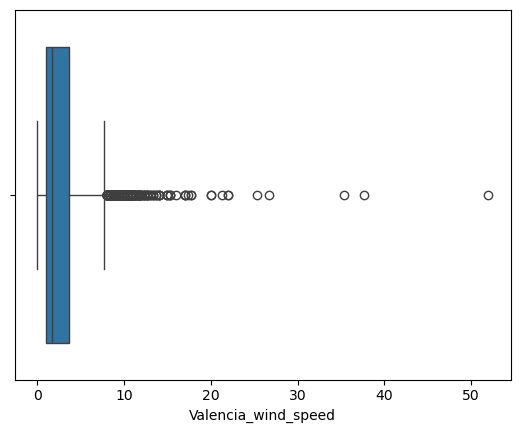

In [12]:
sns.boxplot(x='Valencia_wind_speed', data=df)

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <BarContainer object of 10 artists>)

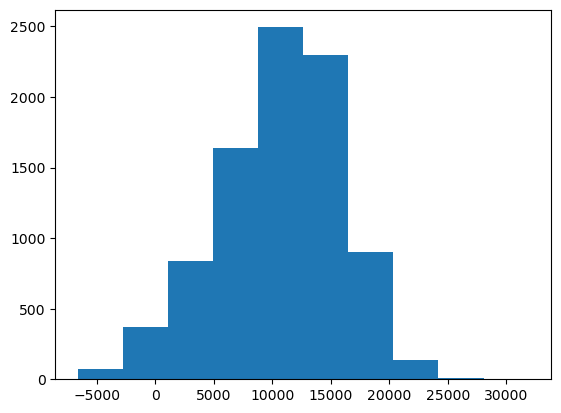

In [13]:
plt.hist(df['load_shortfall_3h'])

In [14]:
print(df.index.to_series().diff().value_counts())  # Sprawdzanie odstępów czasowych

time
0 days 03:00:00    8760
0 days 09:00:00       2
Name: count, dtype: int64


In [15]:
df = df.resample('3H').asfreq()  
df = df.interpolate(method='linear')

C:\Users\Ester\AppData\Local\Temp\ipykernel_3852\1278745488.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('3H').asfreq()


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

<Axes: >

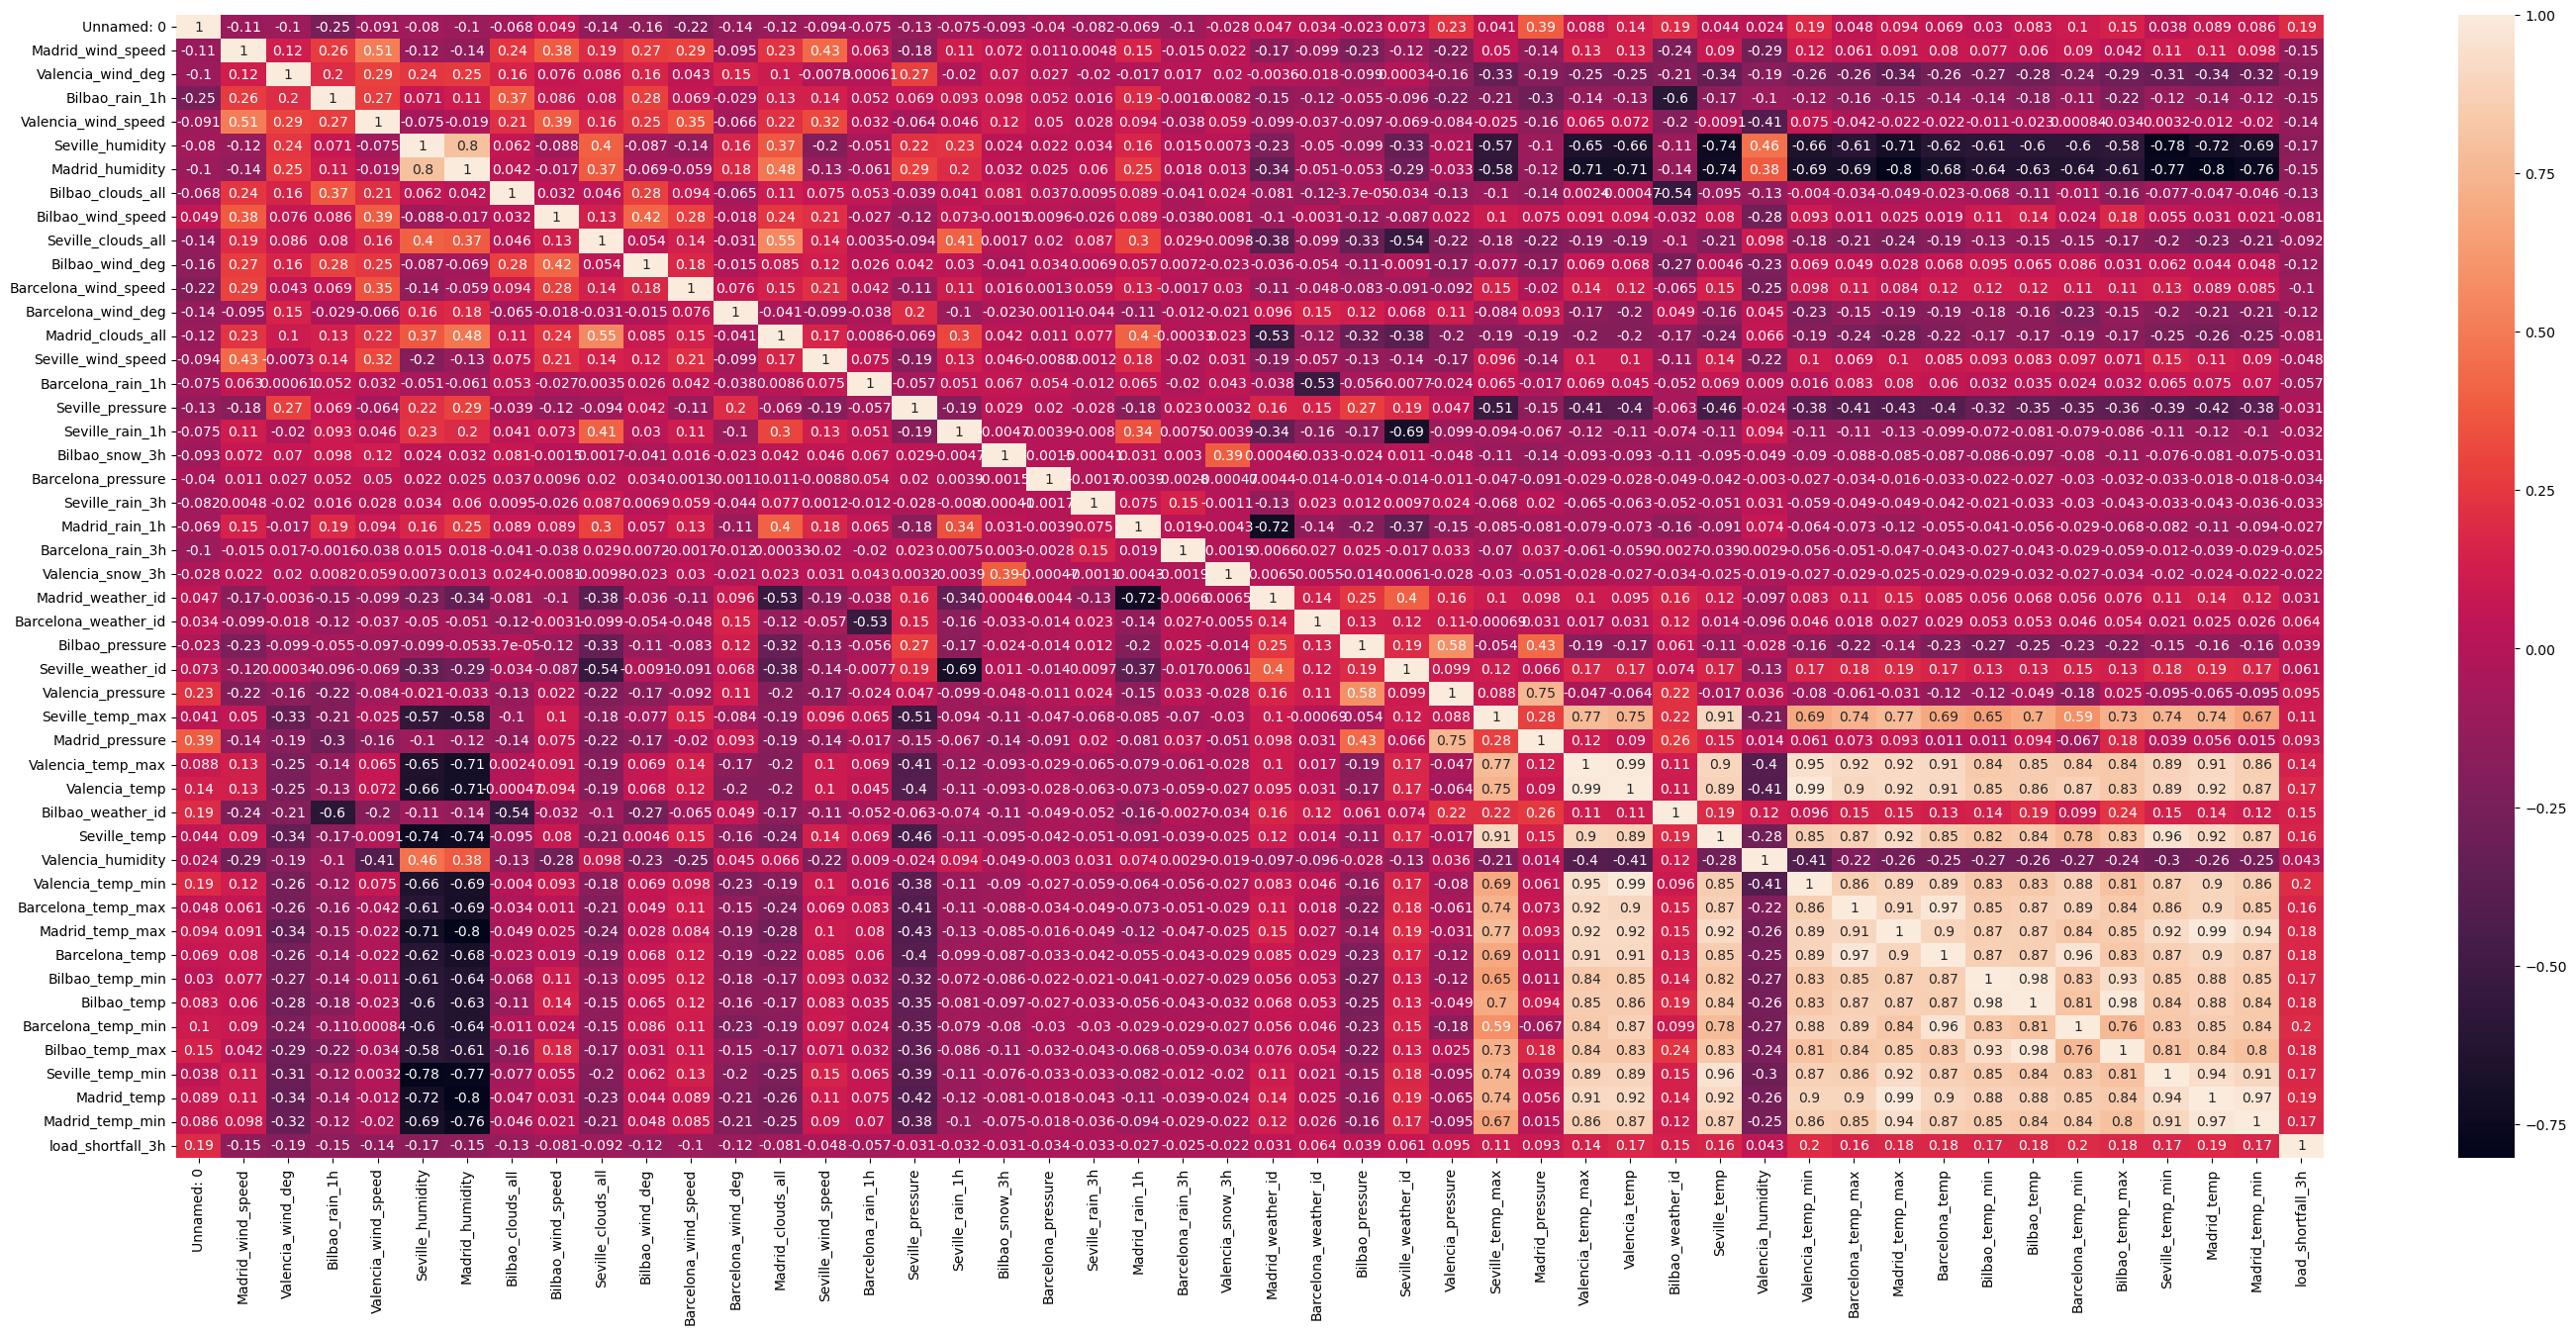

In [17]:
plt.figure(figsize=[35,15])
sns.heatmap(df.corr(),annot=True )

In [18]:
cities = ["Barcelona", "Madrid", "Seville", "Bilbao"]
for city in cities:
    df[f"{city}_weather_id"] = df[f"{city}_weather_id"].astype(int)
    df[f"{city}_weather_id"] = df[f"{city}_weather_id"].astype(float)

In [19]:
for city in cities:
    df[f"{city}_Thunderstorm"] = df[f"{city}_weather_id"].map(lambda x: 1 if x in [200, 210, 221, 230, 231, 232] else 2 if x in [201, 211] else 3 if x in [202, 212] else 0)
    df[f"{city}_Drizzle"] = df[f"{city}_weather_id"].map(lambda x: 1 if x in [300, 310, 321] else 2 if x in [301, 311, 313] else 3 if x in [302, 312, 314] else 0)
    df[f"{city}_Rain"] = df[f"{city}_weather_id"].map(lambda x: 1 if x in [500, 511, 520, 531, 521] else 2 if x in [501, 522] else 3 if x in [502, 503, 504] else 0)
    df[f"{city}_Snow"] = df[f"{city}_weather_id"].map(lambda x: 1 if x in [600, 612, 615, 620, 613, 621] else 2 if x in [601, 611, 616] else 3 if x in [602, 622] else 0)
    df[f"{city}_Clouds"] = df[f"{city}_weather_id"].map(lambda x: 0 if x == 800 else 1 if x == 801 else 2 if x == 802 else 3 if x == 803 else 4 if x == 804 else 0)
    df[f"{city}_Atmosphere_Mist"] = (df[f"{city}_weather_id"] == 701).astype(int)
    df[f"{city}_Atmosphere_Smoke"] = (df[f"{city}_weather_id"] == 711).astype(int)
    df[f"{city}_Atmosphere_Haze"] = (df[f"{city}_weather_id"] == 721).astype(int)
    df[f"{city}_Atmosphere_Dust"] = df[f"{city}_weather_id"].between(731, 761).astype(int)
    df[f"{city}_Atmosphere_Fog"] = (df[f"{city}_weather_id"] == 741).astype(int)
    df[f"{city}_Atmosphere_Sand"] = (df[f"{city}_weather_id"] == 751).astype(int)
    df[f"{city}_Atmosphere_Ash"] = (df[f"{city}_weather_id"] == 761).astype(int)
    df[f"{city}_Atmosphere_Squall"] = (df[f"{city}_weather_id"] == 771).astype(int)
    df[f"{city}_Atmosphere_Tornado"] = (df[f"{city}_weather_id"] == 781).astype(int)
    df[f"{city}_Clear"] = (df[f"{city}_weather_id"] == 800).astype(int)

In [20]:
df['Hour_of_day'] = df.index.hour
df['Day_of_week'] = df.index.dayofweek
df['Day_of_month'] = df.index.day
df['Month_of_year'] = df.index.month
df['Year'] = df.index.year
df['Day_of_year'] = df.index.dayofyear
df['Week_of_year'] = df.index.isocalendar().week

In [21]:
df['load_shortfall_3h_lag_1'] = df['load_shortfall_3h'].shift(1)
df['load_shortfall_3h_lag_2'] = df['load_shortfall_3h'].shift(2)
df = df.dropna(subset=['load_shortfall_3h_lag_1', 'load_shortfall_3h_lag_2'])

In [22]:
X = df.drop(columns = 'load_shortfall_3h')
y = df['load_shortfall_3h'].astype('int')

In [23]:
columns_to_drop = [
    "Madrid_temp_max", "Madrid_temp", "Madrid_temp_min", 
    "Seville_temp_max", "Seville_temp_min", "Seville_temp", "Valencia_temp_max", 
    "Barcelona_temp_max", "Barcelona_pressure", "Valencia_temp_min", "Valencia_temp", "Bilbao_temp_min",
    "Bilbao_temp", "Barcelona_temp_max", "Bilbao_temp_max", "Barcelona_temp_min", "Unnamed: 0", "Barcelona_weather_id", "Madrid_weather_id",
    "Seville_weather_id", "Bilbao_weather_id"
]

In [24]:
X = X.drop(columns=columns_to_drop, axis = 1)
X = X.dropna()

In [25]:
scaler = StandardScaler()
time_index = X.index
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.index = time_index

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [27]:
X_train = X_scaled.loc[X_scaled.index < '2017-05-26 00:00:00']
X_test = X_scaled.loc[X_scaled.index >= '2017-05-26 00:00:00']
y_train = y.loc[y.index < '2017-05-26 00:00:00']
y_test = y.loc[y.index >= '2017-05-26 00:00:00']

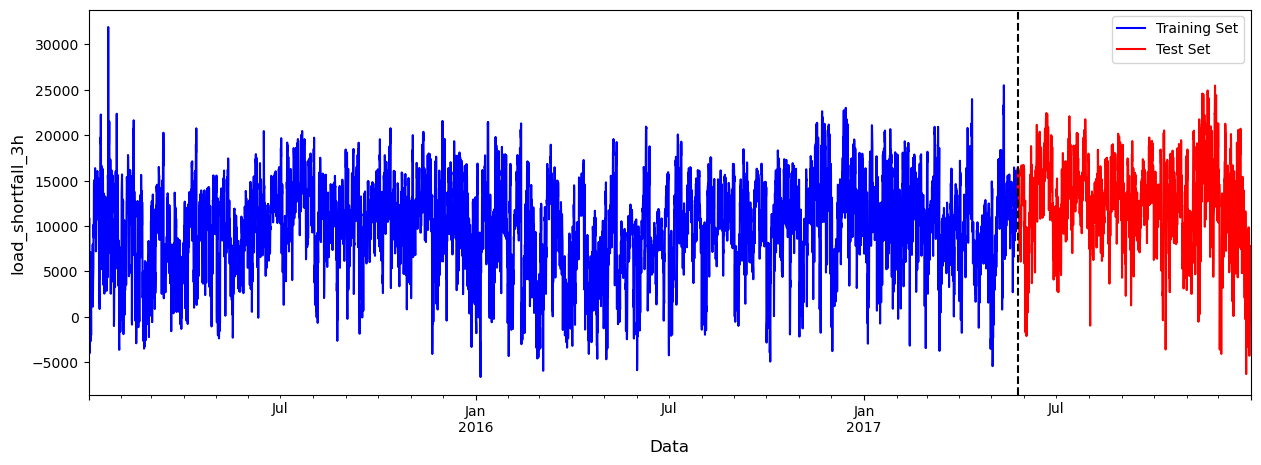

In [28]:
fig, ax = plt.subplots(figsize=(15, 5))
y_train.plot(ax=ax, label='Training Set', color='blue')
y_test.plot(ax=ax, label='Test Set', color='red')
ax.axvline(x='2017-05-26 00:00:00', color='black', ls='--')
ax.legend()
ax.set_xlabel("Data", fontsize=12)
ax.set_ylabel("load_shortfall_3h", fontsize=12)
plt.show()

XGBoost

In [30]:
XGB_reg = xgb.XGBRegressor(
    max_depth=4,
    learning_rate=0.012124628117447038,
    n_estimators=1200,
    subsample=0.9860393119095388,
    colsample_bytree=0.921092663790075,
    reg_alpha=0.0694305802962762,
    reg_lambda=0.00023029142669961857
)
XGB_reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = True)
XGB_predict = XGB_reg.predict(X_test)

[0]	validation_0-rmse:5107.20549	validation_1-rmse:5544.86719
[1]	validation_0-rmse:5059.45344	validation_1-rmse:5495.01173
[2]	validation_0-rmse:5020.46423	validation_1-rmse:5452.47125
[3]	validation_0-rmse:4973.89697	validation_1-rmse:5403.95335
[4]	validation_0-rmse:4928.09134	validation_1-rmse:5356.17796
[5]	validation_0-rmse:4882.79186	validation_1-rmse:5309.18252
[6]	validation_0-rmse:4842.79618	validation_1-rmse:5264.40720
[7]	validation_0-rmse:4798.74028	validation_1-rmse:5217.39209
[8]	validation_0-rmse:4755.49744	validation_1-rmse:5171.11124
[9]	validation_0-rmse:4712.39272	validation_1-rmse:5126.75568
[10]	validation_0-rmse:4670.04033	validation_1-rmse:5083.10319
[11]	validation_0-rmse:4628.31496	validation_1-rmse:5038.52810
[12]	validation_0-rmse:4587.17083	validation_1-rmse:4996.17700
[13]	validation_0-rmse:4546.69813	validation_1-rmse:4954.31243
[14]	validation_0-rmse:4506.83059	validation_1-rmse:4911.66475
[15]	validation_0-rmse:4467.41435	validation_1-rmse:4870.93143
[1

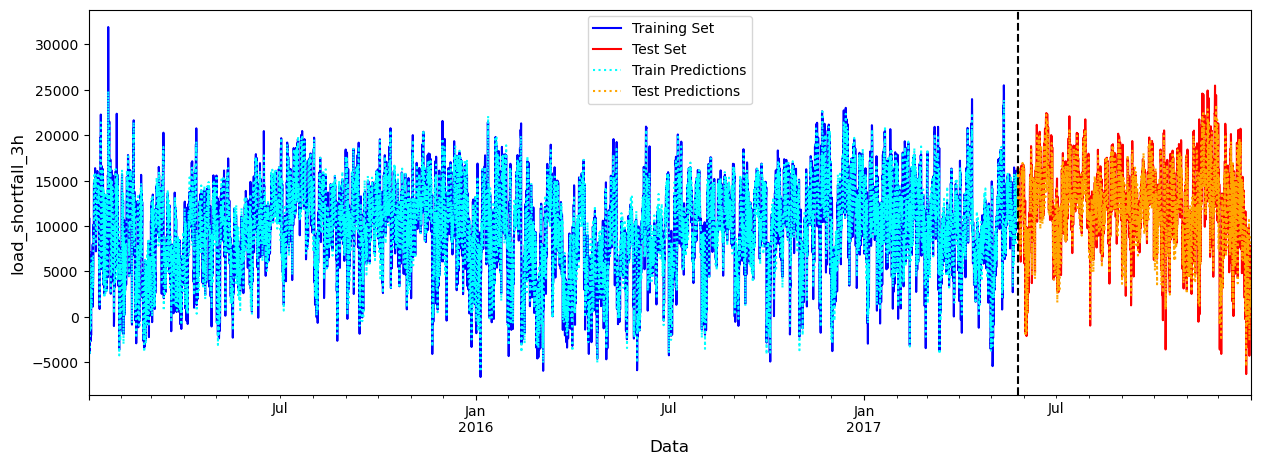

Decision Tree Model

In [33]:
Reg_tree = DecisionTreeRegressor(random_state=42)
# Fitting the model
Reg_tree.fit(X_train,y_train)
Tree_pred = Reg_tree.predict(X_test)

Random Forest

In [35]:
RF = RandomForestRegressor(n_estimators= 500, max_depth= 19, min_samples_split= 13, min_samples_leaf= 2)
RF.fit(X_train,y_train)
RF_predict = RF.predict(X_test)

LSTM

In [38]:
y_index = y.index
y_values = y.values
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_values.reshape(-1, 1))
y_scaled_series = pd.Series(y_scaled.flatten(), index=y_index)
y_train = y_scaled_series.loc[y_scaled_series.index < '2017-05-26 00:00:00']
y_test = y_scaled_series.loc[y_scaled_series.index >= '2017-05-26 00:00:00']

In [40]:
sequence_length = 2
n_features = 96
train_generator = TimeseriesGenerator(X_train, y_train, length=sequence_length, batch_size=8)
test_generator = TimeseriesGenerator(X_test, y_test, length=sequence_length, batch_size=8)

In [42]:
model = Sequential([
    LSTM(100, activation='relu', input_shape=(sequence_length, n_features), return_sequences=True),
    Dropout(0.2),  # Warstwa Dropout w celu regularyzacji
    LSTM(50, activation='relu'),  # Dodanie drugiej warstwy LSTM
    Dropout(0.2),  # Druga warstwa Dropout
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(train_generator, epochs=9, validation_data=test_generator, verbose=1)

Epoch 1/9


E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
E:\Anaconda\Lib\site-packages\keras\src\legacy\preprocessing\sequence.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in r

876/876 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.7976 - val_loss: 0.5908
Epoch 2/9
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4549 - val_loss: 0.4192
Epoch 3/9
876/876 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3741 - val_loss: 0.3962
Epoch 4/9
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3215 - val_loss: 0.3534
Epoch 5/9
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2960 - val_loss: 0.4353
Epoch 6/9
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2747 - val_loss: 0.3360
Epoch 7/9
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2536 - val_loss: 0.3697
Epoch 8/9
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2278 - val_loss: 0.4582
Epoch 9/9
876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2063 - val_loss: 0.3305


In [43]:
y_train_pred = model.predict(train_generator)  # Prognozy na zbiorze treningowym
y_test_pred = model.predict(test_generator)  # Prognozy na zbiorze testowym

# Jeśli masz więcej prognoz niż indeksów, przytnij je, by pasowały do odpowiednich długości
y_train_pred_rescaled = scaler_y.inverse_transform(y_train_pred)
y_test_pred_rescaled = scaler_y.inverse_transform(y_test_pred)

# W zależności od liczby próbek w zbiorach treningowym i testowym, przytnij prognozy
y_train_pred_rescaled = y_train_pred_rescaled[:len(y_train)]
y_test_pred_rescaled = y_test_pred_rescaled[:len(y_test)]

# Konwersja na pandas Series, zachowując indeksy
y_train_pred_series = pd.Series(y_train_pred_rescaled.flatten(), index=y_train.index[:len(y_train_pred_rescaled)])
LSTM_predict = pd.Series(y_test_pred_rescaled.flatten(), index=y_test.index[:len(y_test_pred_rescaled)])

876/876 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [60]:
X_train = X_scaled.loc[X_scaled.index < '2017-05-26 00:00:00']
X_test = X_scaled.loc[X_scaled.index >= '2017-05-26 00:00:00']
y_train = y.loc[y.index < '2017-05-26 00:00:00']
y_test = y.loc[y.index >= '2017-05-26 00:00:00']

In [62]:
Des_ = pd.DataFrame({'Actual': y_test, 'Predicted': Tree_pred})
Rand_ = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})
XGB_ = pd.DataFrame({'Actual': y_test, 'Predicted': XGB_predict})
LSTM_ = pd.DataFrame({'Actual': y_test, 'Predicted' : LSTM_predict})

In [64]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict)),
                        "XGBoost" : np.sqrt(metrics.mean_squared_error(y_test,XGB_predict)),
                        "LSTM" : np.sqrt(metrics.mean_squared_error(y_test[2:],LSTM_predict))
                        }
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

,Test RMSE
Decision Tree,2502.348578
Random Forest,1759.008402
XGBoost,1731.532697
LSTM,2999.513971


In [66]:
Model_Performance4= { 
    
                      'Test R^2':
                    
                        {
                        "Decision Tree" : (metrics.r2_score(y_test,Tree_pred)),
                        "Random Forest" : (metrics.r2_score(y_test,RF_predict)),
                         "XGBoost" : np.sqrt(metrics.r2_score(y_test,XGB_predict)),
                        "LSTM" : np.sqrt(metrics.r2_score(y_test[2:],LSTM_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

,Test R^2
Decision Tree,0.735971
Random Forest,0.869536
XGBoost,0.934655
LSTM,0.788000


# Best Model: XGBoost

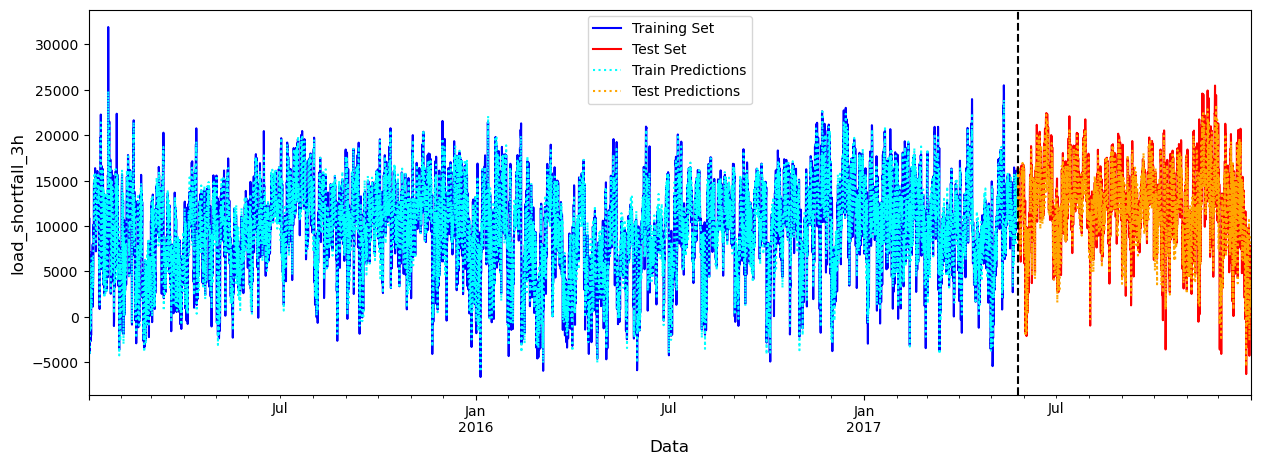

In [68]:
y_train_pred = pd.Series(XGB_reg.predict(X_train), index=y_train.index)  
y_test_pred = pd.Series(XGB_reg.predict(X_test), index=y_test.index)  
fig, ax = plt.subplots(figsize=(15, 5))
y_train.plot(ax=ax, label='Training Set', color='blue')
y_test.plot(ax=ax, label='Test Set', color='red')
y_train_pred.plot(ax=ax, label='Train Predictions', color='cyan', linestyle="dotted")
y_test_pred.plot(ax=ax, label='Test Predictions', color='orange', linestyle="dotted")
ax.axvline(x=pd.to_datetime('2017-05-26 00:00:00'), color='black', ls='--')
ax.legend()
ax.set_xlabel("Data", fontsize=12)
ax.set_ylabel("load_shortfall_3h", fontsize=12)
plt.show()

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, XGB_predict, alpha=0.5, color='blue') 
plt.xlim(-6500, 26000)
plt.ylim(-6500, 26000)
plt.ylabel('Predicted', size=20)
plt.xlabel('Actual', size=20)
plt.show()

In [ ]:
explainer = shap.Explainer(XGB_reg)
shap_values = explainer(X_train)
shap.initjs()

In [ ]:
#Wyjaśnienie dla 180 obserwacji
shap.plots.waterfall(shap_values[203])

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.force(shap_values[0:100])

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.scatter(shap_values[:,"Hour_of_day"])

In [ ]:
# discuss chosen methods logic